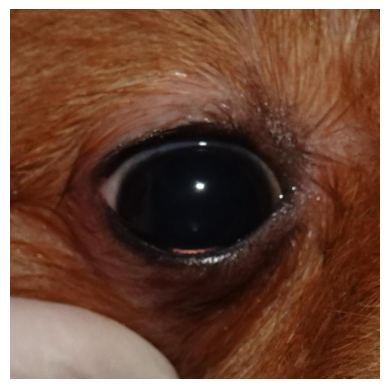

1/1 [==============================] - 0s 409ms/step
Predicted Disease: Mastopathy
Confidence: 0.5273181


In [1]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('MobileNetV2_multi.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize image to match model's expected sizing
    img_array = np.array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch size of 1
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Function to predict the disease
def predict_disease(image_path, model):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Get the index of the predicted class
    confidence = np.max(predictions[0])  # Get the confidence of the prediction
    return predicted_class, confidence

# Map model's output class indices to disease names
class_names = {
    0: 'Blepharitis',
    1: 'Conjunctivitis',
    2: 'Entropion',
    3: 'Eyelid Tumor',
    4: 'Healthy Eye',
    5: 'Mastopathy',
    6: 'Nuclear Sclerosis',
    7: 'Pigment Keratitis'
}

# Path to the image you want to predict
image_path = '/Users/chamidiperera/Documents/FYP Codes/Care/backend/models/mobileNetV2/eye/entr.jpg'

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Make prediction
prediction, confidence = predict_disease(image_path, model)
predicted_class = class_names[prediction]
print("Predicted Disease:", predicted_class)
print("Confidence:", confidence)